# Plot Fig 5

## Hide or show code

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off the raw code."></form>''')

## Import packages

In [2]:
import matplotlib.pyplot as mp
import matplotlib.gridspec as gs
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
import pickle as pc
from pyabc import History
import scipy as sp
import numpy as np

## Plot and save figure

N: 1.45e+07 3.49e+05 5.82e-02


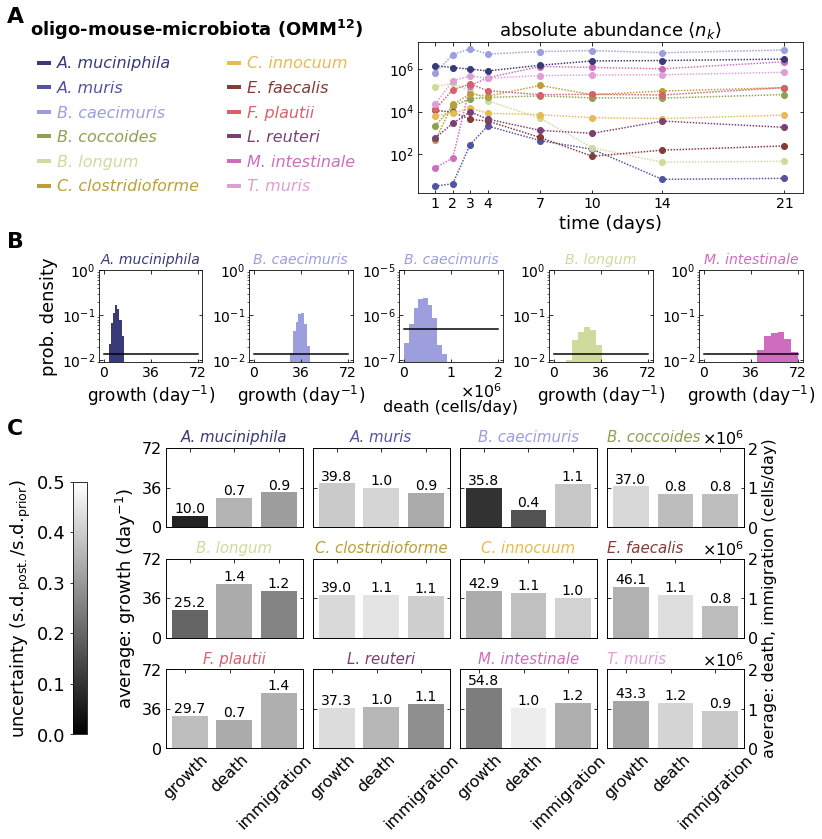

In [23]:
# Make figure
fig = mp.figure(figsize=(13, 13))

# Create array to build figure panels
gs0 = gs.GridSpec(28, 1, figure=fig)

# Create top panels (Fig 5A)
gsA = gs0[:8].subgridspec(21, 30)

axA00 = fig.add_subplot(gsA[:, :10])
axA01 = fig.add_subplot(gsA[:-5, 14:])

# Create middle panels (Fig 5B)
gsB = gs0[9:14].subgridspec(20, 34)

axB00 = fig.add_subplot(gsB[:-5, 1:6])
axB01 = fig.add_subplot(gsB[:-5, 8:13])
axB02 = fig.add_subplot(gsB[:-5, 15:20])
axB03 = fig.add_subplot(gsB[:-5, 22:27])
axB04 = fig.add_subplot(gsB[:-5, 29:])

# Create lower panels (Fig 5C)
gsC = gs0[16:].subgridspec(9, 25, wspace=0.5, hspace=6.)

axC00 = fig.add_subplot(gsC[:3, 3:8])
axC01 = fig.add_subplot(gsC[:3, 8:13])
axC02 = fig.add_subplot(gsC[:3, 13:18])
axC03 = fig.add_subplot(gsC[:3, 18:23])

axC10 = fig.add_subplot(gsC[3:6, 3:8])
axC11 = fig.add_subplot(gsC[3:6, 8:13])
axC12 = fig.add_subplot(gsC[3:6, 13:18])
axC13 = fig.add_subplot(gsC[3:6, 18:23])

axC20 = fig.add_subplot(gsC[6:, 3:8])
axC21 = fig.add_subplot(gsC[6:, 8:13])
axC22 = fig.add_subplot(gsC[6:, 13:18])
axC23 = fig.add_subplot(gsC[6:, 18:23])

axC00_t = axC00.twinx()
axC01_t = axC01.twinx()
axC02_t = axC02.twinx()
axC03_t = axC03.twinx()

axC10_t = axC10.twinx()
axC11_t = axC11.twinx()
axC12_t = axC12.twinx()
axC13_t = axC13.twinx()

axC20_t = axC20.twinx()
axC21_t = axC21.twinx()
axC22_t = axC22.twinx()
axC23_t = axC23.twinx()

# Name microbial types
omm12_names = ['A. muciniphila', 'A. muris', 'B. caecimuris', 'B. coccoides', 'B. longum', 'C. clostridioforme', 'C. innocuum', 'E. faecalis', 'F. plautii', 'L. reuteri', 'M. intestinale', 'T. muris']

# Build colours for each microbial type
colors = {}
for i in range(12):
    colors[omm12_names[i]] = mp.colormaps['tab20b'](i/11)

# OMM-12 microbial types named and coloured
axA00.axis('off')
axA00.legend([Line2D([0],[0],color=colors[name],lw=4) for name in omm12_names], omm12_names, labelcolor='linecolor', loc='upper center', ncol=2, prop=dict(style='italic',size=16), frameon=False, handletextpad=0.5, labelspacing=0.6, handlelength=0.6, columnspacing = 1.9)
axA00.set_title(r'oligo-mouse-microbiota (OMM$\bf{^{12}}$)', weight='bold', fontsize=18)

# General setup of the figure panels
for ax in [axC00, axC01, axC02, axC03, axC10, axC11, axC12, axC13]:
    ax.tick_params(labelbottom=False)

for ax in [axC01, axC02, axC03, axC11, axC12, axC13, axC21, axC22, axC23]:
    ax.tick_params(labelleft=False)
    
for ax in [axC00_t, axC01_t, axC02_t, axC10_t, axC11_t, axC12_t, axC20_t, axC21_t, axC22_t]:
    ax.tick_params(labelright=False)

for ax in [axC00_t, axC01_t, axC02_t, axC03_t, axC10_t, axC11_t, axC12_t, axC13_t, axC20_t, axC21_t, axC22_t, axC23_t]:
    ax.tick_params(axis='both', direction='in', right=True)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
    ax.yaxis.offsetText.set_fontsize(16)
    
for ax in [axC00, axC01, axC02, axC03, axC10, axC11, axC12, axC13, axC20, axC21, axC22, axC23]:
    ax.tick_params(axis='both', direction='in', top=True, right=False, bottom=False)
    
for ax in [axC00, axC10, axC20, axC03_t, axC13_t, axC23_t]:
    ax.yaxis.set_tick_params(labelsize=16)
    ax.locator_params(axis='y', nbins=3)
    
for ax in [axB00, axB01, axB02, axB03, axB04]:
    ax.locator_params(axis='x', nbins=3)

# Import OMM-12 absolute abundance data and parameters
with open('../data/omm12/experimental_abs_abund.pickle', 'rb') as f: 
    omm12_abs_abund = pc.load(f)
omm12_abs_abund = omm12_abs_abund['data']["moments"]

with open('../data/omm12/logistic_inference_parameters.pickle', 'rb') as f:
    logistic_inf_par =  pc.load(f)
logistic_priors_dict = logistic_inf_par['priors_dict']
    
# Sampling times of OMM-12
sampling_times = np.array([1, 2, 3, 4, 7, 10, 14, 21])

# General parameters
t_points = len(sampling_times)
n_types = 12
n_timeseries = 4

# Build dictionary from short to long microbial types names
df_col_names = ['KB18', 'YL2', 'YL58', 'KB1', 'I46', 'YL32', 'YL27', 'I48', 'YL31', 'I49', 'YL45', 'YL44']
names_short_2_long = {'KB18': 'A. muris', 'YL2': 'B. longum', 'YL58': 'B. coccoides', 'KB1': 'E. faecalis', 'I46': 'C. innocuum', 'YL32': 'C. clostridioforme', 'YL27': 'M. intestinale', 'I48': 'B. caecimuris', 'YL31': 'F. plautii', 'I49': 'L. reuteri', 'YL45': 'T. muris', 'YL44': 'A. muciniphila'}

# Assign panels to each microbial type
names_2_axes = {'YL44': axC00, 'KB18': axC01, 'I48': axC02, 'YL58': axC03, 'YL2': axC10, 'YL32': axC11, 'I46': axC12, 'KB1': axC13, 'YL31': axC20, 'I49': axC21, 'YL27': axC22, 'YL45': axC23}
names_2_axes_t = {'YL44': axC00_t, 'KB18': axC01_t, 'I48': axC02_t, 'YL58': axC03_t, 'YL2': axC10_t, 'YL32': axC11_t, 'I46': axC12_t, 'KB1': axC13_t, 'YL31': axC20_t, 'I49': axC21_t, 'YL27': axC22_t, 'YL45': axC23_t}

## Plot Fig 5A (OMM dynamics data)
# Plot timeseries of first moments
for i in range(n_types):
    type_name = names_short_2_long[df_col_names[i]]
    axA01.semilogy(sampling_times, omm12_abs_abund[:, i], 'o', '.-', linestyle=(0,(1,1)), color = colors[type_name])
axA01.set_xlim(xmin=0)
axA01.set_xticks(sampling_times)

# Import inference posteriors from OMM-12
omm12_logistic_history_abs_abund = History("sqlite:///../data/omm12/logistic_inference_abs_abund.db", _id=1)
omm12_logistic_posteriors = omm12_logistic_history_abs_abund.get_distribution(m=0,t=omm12_logistic_history_abs_abund.max_t)[0]
with open('../data/omm12/experimental_abs_abund.pickle', 'rb') as f:
    omm12_data_abs_abund =  pc.load(f)
omm12_types_names = omm12_data_abs_abund['types_names']

# Compute mean, standard deviation, and uncertainty from the OMM-12 posteriors for all parameters
gR_mean = np.zeros(n_types)
gR_sd = np.zeros(n_types)
gR_uncertainty = np.zeros(n_types)
dR_mean = np.zeros(n_types)
dR_uncertainty = np.zeros(n_types)
mR_mean = np.zeros(n_types)
mR_uncertainty = np.zeros(n_types)

for type_i in range(n_types):
    
    # Growth Rate
    gR_mean[type_i] = np.mean(omm12_logistic_posteriors.loc[:,'gR_%i'%type_i])
    gR_sd_posterior = np.std(omm12_logistic_posteriors.loc[:,'gR_%i'%type_i])
    gR_prior = logistic_priors_dict['gR_%i'%type_i]
    if gR_prior[0] == 'uniform':
        gR_sd_prior = (gR_prior[2] - gR_prior[1]) / 2
    if gR_prior[0] == 'norm':
        gR_sd_prior = gR_prior[2]
    gR_uncertainty[type_i] = abs(gR_sd_posterior / gR_sd_prior)
    # Death Rate
    dR_mean[type_i] = np.mean(omm12_logistic_posteriors.loc[:,'dR_%i'%type_i])
    dR_sd_posterior = np.std(omm12_logistic_posteriors.loc[:,'dR_%i'%type_i])
    dR_prior = logistic_priors_dict['dR_%i'%type_i]
    if dR_prior[0] == 'uniform':
        dR_sd_prior = (dR_prior[2] - dR_prior[1]) / 2
    if dR_prior[0] == 'norm':
        dR_sd_prior = dR_prior[2]
    dR_uncertainty[type_i] = abs(dR_sd_posterior / dR_sd_prior)
    # Migration Rate
    mR_mean[type_i] = np.mean(omm12_logistic_posteriors.loc[:,'mR_%i'%type_i])
    mR_sd_posterior = np.std(omm12_logistic_posteriors.loc[:,'mR_%i'%type_i])
    mR_prior = logistic_priors_dict['mR_%i'%type_i]
    if mR_prior[0] == 'uniform':
        mR_sd_prior = (mR_prior[2] - mR_prior[1]) / 2
    if mR_prior[0] == 'norm':
        mR_sd_prior = mR_prior[2]
    mR_uncertainty[type_i] = abs(mR_sd_posterior / mR_sd_prior)

# Carrying capacity
N_mean = np.mean(omm12_logistic_posteriors.loc[:,'N'])
N_sd_posterior = np.std(omm12_logistic_posteriors.loc[:,'N'])
N_prior = logistic_priors_dict['N']
if N_prior[0] == 'uniform':
    N_sd_prior = (N_prior[2] - N_prior[1]) / 2
if N_prior[0] == 'norm':
    N_sd_prior = N_prior[2]
N_uncertainty = abs(N_sd_posterior / N_sd_prior)

# Print the carrying capacity's mean, standard deviation, and uncertainty
print('N:', '%.2e'%N_mean, '%.2e'%N_sd_posterior, '%.2e'%N_uncertainty)

# Sort the parameters according to their uncertainty
par_uncertainty = np.hstack((gR_uncertainty, dR_uncertainty, mR_uncertainty))
par_uncertainty_argsort = np.argsort(par_uncertainty)

# Create colour map for the uncertainty
par_uncertainty_norm = Normalize(vmin=0, vmax=0.5)
cmap_bar = mp.get_cmap('binary_r')

# Assign figure panels for the ranking of "most certain" inferred parameters
axB_by_certainty = [axB00, axB01, axB02, axB03, axB04]

# Plot Fig 5B (Most certain posteriors)
# Identify and plot most certain inferred parameters
for i in range(5):
    
    n_type = par_uncertainty_argsort[:5][i]
        
    ax = axB_by_certainty[i]
    
    # Growth Rates
    if n_type < n_types:
        
        ax.set_ylim(ymin=9E-3)

        type_name_long = names_short_2_long[omm12_types_names[n_type]]
                
        type_color = colors[type_name_long]
        
        # Plot posterior
        ax.hist(omm12_logistic_posteriors.loc[:,'gR_%i'%n_type], color = type_color, alpha = 1., density=True, bins = 10, log=True)
        
        # Plot prior
        x = np.linspace(0., 72, 100)
        y = sp.stats.uniform.pdf(x, 0., 72)
        ax.plot(x, y, color='k', label = 'prior')

        ax.set_xticks([0,36,72])
        
        ax.set_xlabel(r'growth (day$^{-1}$)', fontsize=17)
        ax.set_title('%s'%type_name_long, fontsize=14, color = type_color, style='italic')
    
    # Death rates
    elif n_type >= n_types and n_type < 2 * n_types:

        ax.set_ylim(ymin=9E-8, ymax=1E-5)

        n_type = n_type - n_types

        type_name_long = names_short_2_long[omm12_types_names[n_type]]
                
        type_color = colors[type_name_long]
        
        # Plot posterior
        ax.hist(omm12_logistic_posteriors.loc[:,'dR_%i'%n_type], color = type_color, alpha = 1., density=True, bins = 10, log=True)
        
        # Plot prior
        x = np.linspace(0, 2E6, 100)
        y = sp.stats.uniform.pdf(x, 0, 2E6)
        ax.plot(x, y, color='k', label = 'prior')

        ax.set_xticks([0,1E6,2E6])

        ax.xaxis.offsetText.set_fontsize(16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=True)
        
        ax.set_xlabel(r'death (cells/day)', fontsize=16, labelpad=20)
        ax.set_title('%s'%type_name_long, fontsize=14, color = type_color, style='italic')

    # Migration rates
    else:

        ax.set_ylim(ymin=9E-8, ymax=1E-5)

        n_type = n_type - 2 * n_types

        type_name_long = names_short_2_long[omm12_types_names[n_type]]
                
        type_color = colors[type_name_long]
        
        # Plot posterior
        ax.hist(omm12_logistic_posteriors.loc[:,'mR_%i'%n_type], color = type_color, alpha = 1., density=True, bins = 10, log=True)
        
        # Plot prior
        x = np.linspace(0, 2E6, 100)
        y = sp.stats.uniform.pdf(x, 0, 2E6)
        ax.plot(x, y, color='k', label = 'prior')

        ax.set_xticks([0,1E6,2E6])

        ax.xaxis.offsetText.set_fontsize(16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0), useMathText=True)

        ax.set_xlabel(r'immi. (cells/day)', fontsize=16, labelpad=20)
        ax.set_title('%s'%type_name_long, fontsize=14, color = type_color, style='italic')
    
# Plot Fig 5C (All posteriors)
bar_width = 0.8    
    
for i in range(n_types):
    
    type_name = names_short_2_long[df_col_names[i]]
        
    ax = names_2_axes[df_col_names[i]]
    
    # Growth rate (color, barplot and bar label)
    cmap_bar_gR = cmap_bar(par_uncertainty_norm(gR_uncertainty[i]))
    gR_bar = ax.bar(0, gR_mean[i], bar_width, color=cmap_bar_gR, log=False)
    ax.bar_label(gR_bar, fmt = '%.1f', fontsize = 14)

    # Death rate (color, barplot and bar label)
    ax_t = names_2_axes_t[df_col_names[i]]

    cmap_bar_dR = cmap_bar(par_uncertainty_norm(dR_uncertainty[i]))
    dR_bar = ax_t.bar(1, dR_mean[i], bar_width, color=cmap_bar_dR, log=False)
    ax_t.bar_label(dR_bar, labels = ['%.1f'%(dR_mean[i]/1E6)], fmt = '%.1e', fontsize = 14)
    
    # Migration rate (color, barplot and bar label)
    cmap_bar_mR = cmap_bar(par_uncertainty_norm(mR_uncertainty[i]))
    mR_bar = ax_t.bar(2, mR_mean[i], bar_width, color=cmap_bar_mR, log=False)
    ax_t.bar_label(mR_bar, labels = ['%.1f'%(mR_mean[i]/1E6)], fontsize = 14)
    
    if ax in [axC03, axC13, axC23]:
        loc_title = 'left'
    else:
        loc_title = 'center'
    
    ax.set_title(type_name, color=colors[type_name], loc=loc_title, style='italic', fontsize=15)

# Figure setups and annotations
for ax in [axC00, axC01, axC02, axC03, axC10, axC11, axC12, axC13, axC20, axC21, axC22, axC23]:
    ax.set_yticks([0,36,72])
    
for ax in [axC00_t, axC01_t, axC02_t, axC03_t, axC10_t, axC11_t, axC12_t, axC13_t, axC20_t, axC21_t, axC22_t, axC23_t]:
    ax.set_yticks([0,1E6,2E6])

index = np.arange(3) - 0.5

for ax in [axC20, axC21, axC22, axC23]:
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(['growth', 'death', 'immigration'], fontsize=16, rotation=45)

axC10.set_ylabel('average: growth (day$^{-1}$)', fontsize=18)    

axC13_t.set_ylabel('average: death, immigration (cells/day)', fontsize=16)

ax_cbar_growth = fig.add_axes([0.12,0.14,0.015,0.27])
cbar_growth = ColorbarBase(ax_cbar_growth,cmap=cmap_bar,norm=par_uncertainty_norm,orientation='vertical', ticklocation='left')
cbar_growth.set_label(r'uncertainty (s.d.$_\mathrm{post.}$/s.d.$_\mathrm{prior}$)', fontsize=18)
cbar_growth.ax.tick_params(labelsize=18)

axA01.set_title(r'absolute abundance $\langle n_k \rangle$', fontsize=18)

axA01.set_xlabel('time (days)', fontsize=18)
    
axB00.set_ylabel('prob. density', fontsize=18) 
    
for ax in [axA01, axB00, axB01, axB02, axB03, axB04]:
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

for ax in [axA01, axB00, axB01, axB02, axB03, axB04]:
    ax.tick_params(axis='both', direction='in',top=True, right=True)

# Annotate panels
mp.gcf().text(0.05, 0.9, "A", weight='bold', fontsize=22)
mp.gcf().text(0.05, 0.66, "B", weight='bold', fontsize=22)
mp.gcf().text(0.05, 0.46, "C", weight='bold', fontsize=22)

# Save figure
#mp.tight_layout()
mp.savefig('fig5.pdf', dpi=300, format='pdf', bbox_inches='tight')